# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Krishnakanth Srikanth
#### Student ID: s3959200

Date: 03/09/2023

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used:
* pandas
* re
* numpy
* xml.etree.ElementTree
* datetime
* warnings

## Introduction

In this assessment task, a xml file 's3959200_dataset1.xml which is the input is to be read, cleaned, analyzed and exported to a new csv file 's3959200_dataset1_solution.csv'. Also, the errors that are corrected had to be listed out and exported to a csv file 's3959200_errorlist.csv'. To achieve this, the read xml file is first converted into a dataframe. The problems that were faced here were missing values, present of invalid characters, incorrect datatypes, typos, outliers, irregularities in the data. These were rectified in appropriate ways like replacing 'nan' values to 'non-specified' as per the requirement, to handle invalid characters in the column a function is created which takes help of the regex patterns to get the desired results, covert the datatypes as per the requirement. The outliers in this case, though present, were ignored because '_Salary of each person would not be the same or constant_'. Incorrect spellings or typos are looked after by replacing them with correct words. All these errors and the measures taken to fix them, were recorded to a dataframe by creating a function. Finally, once the dataset is error free, it is exported to the csv file '__s3959200_dataset1_solution.csv__' which would be the input for the task 3. The error file is also exported to '__s3959200_errorlist.csv__'. The datatypes are checked to match the requirement.

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # Display all columns
import xml.etree.ElementTree as etree
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore") # To ignore warnings

## Task 1. Parsing Data

### 1.1. Examining and loading data
Examine "\<student\_id\>_dataset1.xml" to determine its content and structure, then load it into Python. Explain your findings here, e.g., how are the records are stored? 

In this step, the input xml file is read using pandas library **etree** and saved in a variable '__xml_data__' which is later used for data cleaning and analysis.

In [2]:
# Code to inspect the provided data file
# Couple of notes for all code block in this notebook
## please provide proper comment on your code
## Please re-start and run all cells to make sure codes are runable and include your output in the submission
xml_data = etree.parse("./s3959200_dataset1.xml")
print(xml_data)

In [3]:
# To check the root tag
root = xml_data.getroot()     
root.tag

'Jobs'

In [4]:
# Find the length of the root 
len(root)

107

In [5]:
# Find the first element in the root
root[0]

<Element 'Src' at 0x00000208CC5B9D60>

In [6]:
# Find the first tag inside the root's first element
root[0][0]

<Element 'Record' at 0x00000208CC5B9DB0>

In [7]:
# Look out for tags inside 'Record'
for tags in root[0][0]:
    print(tags)

<Element 'Id' at 0x00000208CC5B9E00>
<Element 'Title' at 0x00000208CC5B9E50>
<Element 'Location' at 0x00000208CC5B9EF0>
<Element 'Company' at 0x00000208CC5B9F40>
<Element 'ContractType' at 0x00000208CC5BC040>
<Element 'ContractTime' at 0x00000208CC5BC090>
<Element 'Category' at 0x00000208CC5BC0E0>
<Element 'Salary' at 0x00000208CC5BC130>
<Element 'Date' at 0x00000208CC5BC180>


In [8]:
# dataFromXml = {}
# dataFromXml['Id'] = []
# dataFromXml['Title'] = []
# dataFromXml['Location'] = []
# dataFromXml['Company'] = []
# dataFromXml['ContractType'] = []
# dataFromXml['ContractTime'] = []
# dataFromXml['Category'] = []
# dataFromXml['Salary'] = []
# dataFromXml['openDate'] = []
# dataFromXml['closeDate'] = []

### 1.2 Parsing data into the required format

In here, the read xml file is created as a pandas dataframe by iterating through the tags in the xml and storing the values of the respective tags in the respective lists created.

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [9]:
# Code to parse data
SourceName = []
ID = []
Title =[]
Location = []
Company = []
ContractType = []
ContractTime = []
Category =[]
Salary =[]
OpenDate = []
CloseDate = []

for tags in root.findall('Src'):
    for rec in tags.findall('Record'):
        # Source Name
        src_att = tags.attrib['SrcName']
        #dataFromXml['SourceName'].append(src_att)
        SourceName.append(src_att)
        # ID
        id_att=rec.find('Id')
        #dataFromXml['ID'].append(id_att.text)
        ID.append(id_att.text)
        
        # Title
        title_att = rec.find('Title')
        #dataFromXml['Title'].append(title_att.text)
        Title.append(title_att.text)
        
        # Location
        location_att = rec.find('Location')
        #dataFromXml['Location'].append(location_att.text)
        Location.append(location_att.text)
        
        # Company
        company_att = rec.find('Company')
        #dataFromXml['Company'].append(company_att.text)
        if company_att is None:
            #dataFromXml['Company'].append("")
            Company.append("")
        else:
            #dataFromXml['Company'].append(company_att.text)
            Company.append(company_att.text)

        # Contract Type
        contractType_att = rec.find('ContractType')
        #dataFromXml['ContractType'].append(contractType_att.text)
        if contractType_att is None:
            #dataFromXml['ContractType'].append("")
            ContractType.append("")
        else:
            #dataFromXml['ContractType'].append(contractType_att.text)
            ContractType.append(contractType_att.text)
            
        # Contract Time
        contractTime_att = rec.find('ContractTime')
        #dataFromXml['ContractTime'].append(contractTime_att.text)
        if contractTime_att is None:
            #dataFromXml['ContractTime'].append("")
            ContractTime.append("")
        else:
            #dataFromXml['ContractTime'].append(contractTime_att.text)
            ContractTime.append(contractTime_att.text)
            
        # Category
        category_att = rec.find('Category')
        #dataFromXml['Category'].append(category_att.text)
        if category_att is None:
            #dataFromXml['Category'].append("")
            Category.append("")
        else:
            #dataFromXml['Category'].append(category_att.text)
            Category.append(category_att.text)
            
        # Salary
        salary_att = rec.find('Salary')
        #dataFromXml['Salary'].append(salary_att.text)
        if salary_att is None:
            #dataFromXml['Salary'].append("")
            Salary.append("")
        else:
            #dataFromXml['Salary'].append(salary_att.text)
            Salary.append(salary_att.text)
            
        # Open Date
        for date_att in rec.findall('Date'):
            openDate=date_att.find('OpenDate')
            #dataFromXml['OpenDate'].append(openDate.text)
            OpenDate.append(openDate.text)
            
        # CLose Date
        for date_att in rec.findall('Date'):
            closeDate=date_att.find('CloseDate')
            #dataFromXml['CloseDate'].append(closeDate.text)
            CloseDate.append(closeDate.text)

In [10]:
# Creating a dataframe
data_df = pd.DataFrame(columns=['Id', 'Title', 'Location', 'Company', 'ContractType', 'ContractTime', 'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName'])

data_df['Id'] = ID
data_df['Title'] =Title
data_df['Location'] = Location
data_df['Company'] = Company
data_df['ContractType'] = ContractType
data_df['ContractTime'] = ContractTime
data_df['Category'] = Category
data_df['Salary'] = Salary
data_df['OpenDate'] = OpenDate
data_df['CloseDate'] = CloseDate
data_df['SourceName'] = SourceName
data_df.head(3)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,63129905,"Nursery Nurse, Liverpool",Liverpool,Caring Services NW,full_time,contract,Teaching Jobs,12480,20130917T150000,20131116T150000,fish4.co.uk
1,69830611,Money/Welfare Advice Workers (x****),UK,,full_time,contract,Accounting & Finance Jobs,24700,20121230T120000,20130228T120000,fish4.co.uk
2,69219032,Senior Design Engineer up to ****,UK,Huxley Associates,full_time,permanent,Engineering Jobs,37500,20120903T150000,20121202T150000,fish4.co.uk


......

## Task 2. Auditing and cleansing the loaded data

Here, you should write your own code to audit data, identify data problems and to fix them. You are also required to record the errors found and fixings in an error list.

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In this step, a function is created to update the errors and the fix that has made to rectify the errors. The output of this function is saved as a dataframe.

In [11]:
# Code to audit data

# Creating a function to update errors and its solution
item_error_list_update = ['indexOfdf', 'Id', 'ColumnName', 'Original', 'Modified', 'ErrorType', 'Fixing']
error_list = pd.DataFrame(columns=item_error_list_update)
def updateErrorList(indexOfdf, Id, ColumnName, Original, Modified, ErrorType, Fixing):
    errored_item=[indexOfdf, Id, ColumnName, Original, Modified, ErrorType, Fixing]
    error_list.loc[len(error_list)]=errored_item

##### Error 1: Checking for any non-character value in the dataframe

In [12]:
data_df['ContractType'].unique()

array(['full_time', 'part_time', '', ' ', 'N/A', '-'], dtype=object)

In [13]:
data_df['ContractTime'].unique()

array(['contract', 'permanent', '', ' ', 'N/A', '-'], dtype=object)

In [14]:
data_df.replace(['',' ','-','N/A'], np.nan, inplace=True)

In [15]:
# Error list update
updateErrorList('ALL','ALL','ALL',"'',' ','-','N/A'",'nan','Invalid values','Replaced invalid values to nan')

##### Error 2: Checking for any null or missing values in the dataframe

In [16]:
data_df.isnull().sum()

Id                  0
Title               0
Location            0
Company          4935
ContractType    38082
ContractTime    14101
Category            0
Salary           2368
OpenDate            0
CloseDate           0
SourceName          0
dtype: int64

In [17]:
# Replacing Nan in Company to 'non-specified'
data_df['Company'].fillna('non-specified', inplace=True)
# Replacing '.', '21', '591' in Company to 'non-specified' as these are not a valid company name
data_df['Company'] = data_df['Company'].apply(lambda company : 'non-specified' if company == '.' else company)
data_df['Company'] = data_df['Company'].apply(lambda company : 'non-specified' if company == '21' else company)
data_df['Company'] = data_df['Company'].apply(lambda company : 'non-specified' if company == '591' else company)

# Error list update
updateErrorList('ALL','ALL','Company',"nan",'non-specified','Inconsistent value','Replaced nan values to non-specified')
updateErrorList('49356', '68849372', 'Company', '.', 'non-specified', 'Inconsistent value','Replaced . to non-specified')
updateErrorList('26154', '71276943', 'Company', '21', 'non-specified', 'Not a valid company name','Replaced "21" to non-specified')
updateErrorList('27225', '69473555', 'Company', '591', 'non-specified', 'Not a valid company name','Replaced "591" to non-specified')

In [18]:
# Replacing Nan in ContractType to 'non-specified'
data_df['ContractType'].fillna('non-specified', inplace=True)
# Error list update
updateErrorList('ALL','ALL','ContractType',"nan",'non-specified','Inconsistent value','Replaced nan values to non-specified')

In [19]:
# Replacing Nan in ContractTime to 'non-specified'
data_df['ContractTime'].fillna('non-specified', inplace=True)
# Error list update
updateErrorList('ALL','ALL','ContractTime',"nan",'non-specified','Inconsistent value','Replaced nan values to non-specified')

In [20]:
# Imputing values to Salary column replacing Nan values
data_df['Salary'].fillna(method='ffill', inplace=True)
# Error list update
updateErrorList('ALL','ALL','Salary',"nan",'Value from previous ID','Inconsistent value','Replaced nan values with values from previous ID')

In [21]:
data_df.isna().sum()

Id              0
Title           0
Location        0
Company         0
ContractType    0
ContractTime    0
Category        0
Salary          0
OpenDate        0
CloseDate       0
SourceName      0
dtype: int64

##### Error 3: Checking the datatypes of the columns in the dataframe

In [22]:
data_df.dtypes

Id              object
Title           object
Location        object
Company         object
ContractType    object
ContractTime    object
Category        object
Salary          object
OpenDate        object
CloseDate       object
SourceName      object
dtype: object

###### Error 3.1: Checking for column 'Id'

In [23]:
# Converting datatype of column 'ID'
data_df['Id'] = data_df['Id'].astype('int')
# Error list update
updateErrorList('ALL','ALL','Id',"Object Datatype",'Integer Datatype','Incorrect Datatype','Replaced Object datatype to Integer')

In [24]:
# # Function to convert 'Salary' column to float

# # dummy = {'col': ['12345', '123 To 231', '111 To 222', '222']}
# # dummy_df = pd.DataFrame(dummy)

# def salary_convertor(salary):
#     #print(salary, type(salary))
#     pattern = re.findall(r'\d+', salary)
#     #print(pattern)
#     salary_float = [float(sal) for sal in pattern]
#     #print('sal float:', salary_float)

#     if len(salary_float) == 2:
#         #print('-----------------')
#         #print('sal float[0]:', salary_float[0])
#         #print('salary_float[1]:', salary_float[1])
#         return round((salary_float[0] + salary_float[1]) / 2, 2)
#     else:
#         #print('not in if:', salary)
#         return round(salary_float[0], 2)

# # Applying the function to Salary column
# #dummy['col'] = dummy['df'].apply(salary_convertor)
# data_df['Salary'] = data_df['Salary'].apply(salary_convertor)

# # Error list update
# updateErlist('ALL','ALL','Salary',"Values of type 'xxx To yyy'",'Float value','Incorrect value/Datatype','Replaced incorrect values to Float values')
# updateErlist('ALL','ALL','Salary',"Object Datatype",'Float Datatype','Incorrect Datatype','Replaced Object Datatype to Float Datatype')

###### Error 3.2: Checking for column 'Salary'

In [25]:
# Function to correct 'Salary' column and converting to float
def salary_generator(df):
    salary = df['Salary']
#     if not salary:
#         salary = 0
#         return 0
#    print(salary)
    
    # Case 1: Extract num from 'Salary' with format num - num or num ~ num
    pattern = re.fullmatch(r'(\d+\.?\d*) {1,2}[-~] {1,2}(\d+\.?\d*)', salary)
    if pattern:
        updateErrorList(df.name, df.Id, 'Salary', 'num -|~ num', 'num', 'Invalid data', 'Fixed the incorrect data and converted string to integer')
        return round((float(pattern.group(1)) + float(pattern.group(2)) / 2), 2)
        
    # Case 2: Extract num from 'Salary' with format num To num
    pattern = re.fullmatch(r'(\d+\.?\d*) To (\d+\.?\d*)', salary)
    if pattern:
        updateErrorList(df.name, df.Id, 'Salary', 'num TO num', 'num', 'Invalid data', 'Fixed the incorrect data and converted string to integer')
        return round((float(pattern.group(1)) + float(pattern.group(2)) / 2), 2)
        
    # Case 3: Extract num from 'Salary' with formats like per Year, per year, per Anum, per anum, pa
    pattern = re.fullmatch(r'(\d+\.?\d*)(?: ?per [aA]num| pa|[/\\][yY]ear| ?per [Yy]ear)', salary)
    if pattern:
        updateErrorList(df.name, df.Id, 'Salary', '(?: ?per [aA]num| pa|[/\\][yY]ear| ?per [Yy]ear)', 'num', 'Invalid data', 'Fixed the incorrect data and converted string to integer')
        return float(pattern.group(1))
        
    # Case 4: Extract num from 'Salary' with format num.num p/hr
    pattern = re.fullmatch(r'(\d+\.?\d*)(?: p.{1,4}h.*)', salary)
    if pattern:
        updateErrorList(df.name, df.Id, 'Salary', '(?: p.{1,4}h.*)', 'num', 'Invalid data', 'Fixed the incorrect data and converted string to integer')
        return round((float(pattern.group(1)) * 37.5 * 52), 2)
        
    # Case 5: Extract num from 'Salary' with formats per hour, per Hour, p/h
    pattern = re.fullmatch(r'(\d+\.?\d*)(?: ?per [Hh]our| ?p/h)', salary)
    if pattern:
        updateErrorList(df.name, df.Id, 'Salary', '(?: ?per [Hh]our| ?p/h)', 'num', 'Invalid data', 'Fixed the incorrect data and converted string to integer')
        return round((float(pattern.group(1)) * 37.5 * 52), 2)
    
    # Case 6: Extract num from 'Salary' with format num.something
    pattern = re.fullmatch(r'(\d+\.?\d?)', salary)
    if pattern:
        updateErrorList(df.name, df.Id, 'Salary', '(\d+\.?\d?)', 'num', 'Invalid data', 'Fixed the incorrect data and converted string to integer')
        return float(pattern.group(1))
        
    # Case 7: Extract num from 'Salary' with format numK
    pattern = re.fullmatch(r'(\d+)K', salary)
    if pattern:
        updateErrorList(df.name, df.Id, 'Salary', '(\d+)K', 'num', 'Invalid data', 'Fixed the incorrect data and converted string to integer')
        return round((float(pattern.group(1)) * 1000), 2)

In [26]:
data_df['Salary'] = data_df.apply(salary_generator, axis=1)

##### Error 4: Checking for Irregularities in columns 'OpenDate' and 'CloseDate' and converting its datatype

In [27]:
# OpenDate and CLoseDate
data_df['OpenDate'] = data_df['OpenDate'].replace('T', '', regex=True)
data_df['CloseDate'] = data_df['CloseDate'].replace('T', '', regex=True)
updateErrorList('ALL', 'ALL', 'OpenDate', 'T', '', 'Invalid data', 'Removed T from the string')
updateErrorList('ALL', 'ALL', 'CloseDate', 'T', '', 'Invalid data', 'Removed T from the string')

In [28]:
# Checking for Irregularities/Impossible value in 'OpenDate'
for i,j in enumerate(data_df['OpenDate']):
    if int(j[4:6]) > 12:
        print(j[4:6], i)

14 34728


In [29]:
# Getting ID for the index
data_df['Id'][34728]

71095186

In [30]:
# Getting the row with Id from the above, to find the row with invalid month in 'OpenDate' column
data_df[data_df['Id']==71095186]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
34728,71095186,RGN Maidstone,Maidstone,Team 24 Ltd,full_time,non-specified,Healthcare & Nursing Jobs,24000.0,20121403150000,20120612150000,staffnurse.com


In [31]:
# Checking for Irregularities/Impossible value in 'CloseDate'
for i,j in enumerate(data_df['CloseDate']):
    if int(j[4:6]) > 12:
        print(j[4:6], i)
# No irregularities in 'CloseDate'

In [32]:
# Irregularities/Impossible value check in 'OpenDate' 
data_df['OpenDate'][34728] = data_df['OpenDate'][34728][0:4] + '04'+ data_df['OpenDate'][34728][6:]
updateErrorList('34728', '71095186', 'OpenDate', '20121403150000', '2012043150000', 'Impossible month', 'Fixed the impossible month from 14 to 12')

In [33]:
# After correcting the invalid month
data_df[data_df['Id']==71095186]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
34728,71095186,RGN Maidstone,Maidstone,Team 24 Ltd,full_time,non-specified,Healthcare & Nursing Jobs,24000.0,20120403150000,20120612150000,staffnurse.com


In [34]:
# Converting OpenDate to Datetime format
for i,j in enumerate(data_df['OpenDate']):
    data_df['OpenDate'][i] = datetime.strptime(j, '%Y%m%d%H%M%S')
data_df['OpenDate'] = pd.to_datetime(data_df['OpenDate'])
updateErrorList('ALL', 'ALL', 'OpenDate', 'Object Datatype', 'DateTime', 'Invalid Datatype', 'Corrected the datatype as per requirement')

# Converting CloseDate to Datetime format
for i,j in enumerate(data_df['CloseDate']):
    data_df['CloseDate'][i] = datetime.strptime(j, '%Y%m%d%H%M%S')
data_df['CloseDate'] = pd.to_datetime(data_df['CloseDate'])
updateErrorList('ALL', 'ALL', 'CloseDate', 'Object Datatype', 'DateTime', 'Invalid Datatype', 'Corrected the datatype as per requirement')

##### Error 5: Checking for outliers

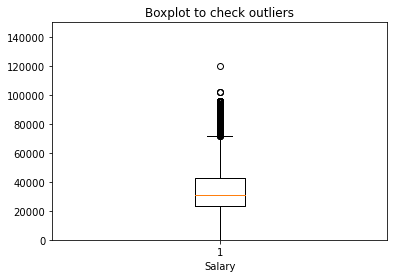

In [35]:
# Check for outliers
import matplotlib.pyplot as plt
plt.boxplot(data_df['Salary'])
plt.title('Boxplot to check outliers')
plt.ylim(0, 1.5e5)
plt.xlabel('Salary')
plt.show()

######  There is the presence of outliers in this scenario, but the outliers are ignored in this case as the *salary of every person varies and is not constant or same*.

##### Error 6: Checking for duplicates

In [36]:
# Check for duplicates
data_df.duplicated().sum()

0

##### Error 7: Checking for any incorrect spellings/typos

In [37]:
# Checking for any incorrect spellings/typos in 'Category' column
data_df['Category'].value_counts()

IT Jobs                             13118
Healthcare & Nursing Jobs            8071
Engineering Jobs                     7522
Accounting & Finance Jobs            6782
Sales Jobs                           4879
Hospitality & Catering Jobs          4400
Teaching Jobs                        3469
PR, Advertising & Marketing Jobs     2512
Name: Category, dtype: int64

In [38]:
# Check for any incorrect spellings/typos in column 'Location'
data_df['Location'] = data_df['Location'].str.lower()
to_change = {'hampshira': 'hampshire', 'leads': 'leeds', 'warringtn':'warrington', 'bolton': 'boston',
            'livepool': 'liverpool', 'manchaster': 'manchester', 'oxfords': 'oxford', 'cembridge': 'cambridge', 
             'croydan': 'croydon', 'londn': 'london'}


changed=[]
for index, row in data_df.iterrows():
    if row['Location'] in to_change:
        fix = 'Corrected spelling from '+ row['Location'] +' to '+ to_change[row['Location']]
        changed.append([index, row['Id'], 'Location', row['Location'], to_change[row['Location']] ,'Incorrect spelling', fix])
error_list = error_list.append(pd.DataFrame(changed, columns=error_list.columns))
data_df['Location'].replace(to_change, inplace=True)

In [39]:
data_df['Location'].value_counts()

uk                   7719
london               6575
south east london    2665
the city             1145
central london        829
                     ... 
broadfield              9
twickenham              9
normanton               9
waterlooville           8
north finchley          7
Name: Location, Length: 478, dtype: int64

##### Dataframe after cleaning and resolving errors

In [40]:
data_df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,63129905,"Nursery Nurse, Liverpool",liverpool,Caring Services NW,full_time,contract,Teaching Jobs,12480.0,2013-09-17 15:00:00,2013-11-16 15:00:00,fish4.co.uk
1,69830611,Money/Welfare Advice Workers (x****),uk,non-specified,full_time,contract,Accounting & Finance Jobs,24700.0,2012-12-30 12:00:00,2013-02-28 12:00:00,fish4.co.uk
2,69219032,Senior Design Engineer up to ****,uk,Huxley Associates,full_time,permanent,Engineering Jobs,37500.0,2012-09-03 15:00:00,2012-12-02 15:00:00,fish4.co.uk
3,69221223,Photocopier Service Engineer,manchester,ETS Technical Selection,full_time,permanent,IT Jobs,20000.0,2013-12-31 12:00:00,2014-03-31 12:00:00,fish4.co.uk
4,69191387,Digital Advertising Sales Executive (Leading O...,aberdeen,Choice Consultants,full_time,permanent,"PR, Advertising & Marketing Jobs",12500.0,2013-06-14 00:00:00,2013-09-12 00:00:00,fish4.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
50748,69117113,Research/Data Analyst,london,non-specified,non-specified,contract,IT Jobs,9600.0,2013-11-29 12:00:00,2013-12-29 12:00:00,3desk.com
50749,71600610,eBooks& Apps Developer Apprenticeship,rochdale,non-specified,non-specified,contract,IT Jobs,71040.0,2013-03-08 12:00:00,2013-05-07 12:00:00,3desk.com
50750,70229148,PHP Developer Bristol,bristol,non-specified,non-specified,contract,IT Jobs,31200.0,2012-12-17 12:00:00,2012-12-31 12:00:00,3desk.com
50751,70229149,CMS (Q****) content upload,milton keynes,non-specified,non-specified,contract,IT Jobs,36000.0,2012-02-21 00:00:00,2012-04-21 00:00:00,3desk.com


##### Datatypes of the dataframe after cleaning and resolving errors

In [41]:
data_df.dtypes

Id                       int32
Title                   object
Location                object
Company                 object
ContractType            object
ContractTime            object
Category                object
Salary                 float64
OpenDate        datetime64[ns]
CloseDate       datetime64[ns]
SourceName              object
dtype: object

##### Created and updated Error list dataframe

In [42]:
error_list

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,ALL,ALL,ALL,"'',' ','-','N/A'",nan,Invalid values,Replaced invalid values to nan
1,ALL,ALL,Company,nan,non-specified,Inconsistent value,Replaced nan values to non-specified
2,49356,68849372,Company,.,non-specified,Inconsistent value,Replaced . to non-specified
3,26154,71276943,Company,21,non-specified,Not a valid company name,"Replaced ""21"" to non-specified"
4,27225,69473555,Company,591,non-specified,Not a valid company name,"Replaced ""591"" to non-specified"
...,...,...,...,...,...,...,...
75,47910,71795469,Location,bolton,boston,Incorrect spelling,Corrected spelling from bolton to boston
76,48024,68617175,Location,bolton,boston,Incorrect spelling,Corrected spelling from bolton to boston
77,49840,72513086,Location,bolton,boston,Incorrect spelling,Corrected spelling from bolton to boston
78,50076,68197545,Location,bolton,boston,Incorrect spelling,Corrected spelling from bolton to boston


......

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [43]:
# code to save output data
# Cleaned dataset
data_df.to_csv("s3959200_dataset1_solution.csv", index=False)

# Error lists updated dataset
error_list.to_csv("s3959200_errorlist.csv", index=False)

## Summary
Give a short summary and anything you would like to talk about the assessment here.

- In this assignment, I have learnt well to read data from xml file and covert it into a pandas dataframe.
- I have learnt how to use and handle regex expressions, how to clean, correct and analyze them.
- Also, how to find errors, clean them with appropriate techniques, analyze them in a correct way, update the errors and also its fixes to a new dataframe as and when it is done and finally to export them to new csv files.